# Fundamentos de Ciencias de Datos

*Esta tarea tiene solamente una parte grupal que se encuentra en el presente cuaderno de Python.*

## Tarea 3

### Objetivos

1. Entender los conceptos básicos del área de _Machine Learning_.
2. Entender cómo medir el desempeño de un algoritmo de regresión y de un algoritmo de clasificación.
3. Familiarización con las herramientas de Python para entrenar y usar algoritmos de _Machine Learning_.

### Metodología

Deberás completar este cuaderno de python, siguiendo las instrucciones contenidas en él. Puedes utilizar contenido que encuentre en internet siempre y cuando lo referencies a través de un comentario. Por ejemplo:

>```Python
># código para abrir archivo obtenido desde  https://uniwebsidad.com/libros/algoritmos-python/capitulo-11
>archivo = open("archivo.txt")
>```

No olvides poner nombres representativos a tus variables. Caso contrario se verá reflejado en una penalización de tu nota.

### Conjuntos de Datos

Se le entregan 4 conjuntos de datos: codigos.csv, psu_2019.csv, presupuesto_2019.csv y poblacion.csv. 

#### codigos.csv

 | columna | descripción |
 | --- | :---: |
 | Código Región | **Entero**: Identificador único para cada región. |
 | Nombre Región | **String**: Nombre de la región. |
 | Abreviatura Región | **String**: Abreviatura (en letras) o nombre corto de la región.  |
 | Código Provincia | **Entero**: Identificador único para cada provincia. |
 | Nombre Provincia | **String**: Nombre de la provincia. |
 | Código Comuna 2018 | **Entero**: Identificador único para cada comuna. |
 | Nombre Comuna | **String**: Nombre de la comuna. |

 #### datos_comunas.csv

 | columna | descripción |
 | --- | :---: |
 | id | **Entero**: Identificador único para cada comuna. Mismo identificador que en **codigos.csv**. |
 | metros_plaza | **Entero**: Cantidad de metros de plaza que tiene la comuna. |
 | metros_parque | **Entero**: Cantidad de metros de parque que tiene la comuna.  |
 | personas_trabaja | **Entero**: Número de personas que trabaja en la municipalidad de la comuna. |

 #### presupuesto_2019.csv

 | columna | descripción |
 | --- | :---: |
 | CODIGO | **Entero**: Identificador único para cada comuna. Mismo identificador que en **codigos.csv**. |
 | MUNICIPIO | **String**: Nombre de la comuna. |
 | PRESUPUESTO | **Entero**: Presupuesto destinado a la comuna.  |

 **Observación**: en la columna `PRESUPUESTO`, hay datos que están como "no recepcionados. Eso puede producir que los análisis fallen, por lo que se recomienda limpiar los datos antes.

 #### poblacion.csv

 | columna | descripción |
 | --- | :---: |
 | CODIGO | **Entero**: Identificador único para cada comuna. Mismo identificador que en **codigos.csv**. |
 | MUNICIPIO | **String**: Nombre de la comuna. |
 | POBLACIÓN | **Entero**: Número de personas que vive en la comuna.  |



## Integrantes

Por favor, llenar acá el nombre de los integrantes de la pareja, junto a la asignación de las consultas de la sección A y la sección B.

- **Integrante 1**: Benjamín Hormazábal Corral
- **Integrante 2**: Vicente Cáceres

## Recomendaciones

Primero, deberías importar en la siguiente celda **TODOS** los módulos de Python necesarios para la correcta ejecución de su tarea.

In [ ]:
#Escriba su código aquí
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Luego, deberías guardar en una (o varias) variable(s) TODOS los sets de datos que utilizarás en la tarea.

In [ ]:
#Escriba su código aquí
df_cod = pd.read_csv('codigos.csv', sep = ';')
df_datos = pd.read_csv('datos_comunas.csv', sep = ',')
df_presupuesto = pd.read_csv('presupuesto_2019.csv', sep = ';')
df_poblacion = pd.read_csv('poblacion.csv', sep = ';')

Utilice las variables previamente guardadas para mostrar parte de la información de todos los conjuntos de datos. Vale decir, si usted creó dos variables, cada una con un conjunto de datos diferente, muestre parte de los dos conjuntos de datos. Esto te ayudará a entender mejor lo que contiene cada fuente de datos.

In [ ]:
#Escriba su código aquí
df_cod.head(5)

,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna
0,1,Tarapacá,TPCA,11,Iquique,1101,Iquique
1,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio
2,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte
3,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña
4,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane


In [ ]:
df_datos.head(5)

,id,metros_plaza,metros_parque,personas_trabaja
0,1101,58460.0,94824.0,271.0
1,1107,130316.0,0.0,55.0
2,1401,NaN,NaN,NaN
3,1402,4050.0,0.0,8.0
4,1403,2532.0,NaN,NaN


In [ ]:
df_presupuesto.head(5)

,CODIGO,MUNICIPIO,PRESUPUESTO
0,1101,IQUIQUE,59072234
1,1107,ALTO HOSPICIO,13984411
2,1401,POZO ALMONTE,7613962
3,1402,CAMIÑA,1584008
4,1403,COLCHANE,2500000


In [ ]:
df_poblacion.head(5)

,CODIGO,MUNICIPIO,POBLACIÓN
0,1101,IQUIQUE,216514
1,1107,ALTO HOSPICIO,124150
2,1401,POZO ALMONTE,16683
3,1402,CAMIÑA,1345
4,1403,COLCHANE,1556


Además, si necesitas hacer algún pre-procesamiento **COMÚN** a todas sus futuras respuestas, deberías hacerlo en la siguiente celda

In [ ]:
#Escriba su código aquí
df_poblacion = df_poblacion[['CODIGO','POBLACIÓN']]
df_presupuesto = df_presupuesto[['CODIGO','PRESUPUESTO']]

In [ ]:
df_cod = df_cod.set_index(['Código Comuna 2018'])
df_datos = df_datos.set_index(['id'])
df_poblacion = df_poblacion.set_index(['CODIGO'])
df_presupuesto = df_presupuesto.set_index(['CODIGO'])

In [ ]:
df = df_cod.join(df_datos)
df = df.join(df_poblacion)
df = df.join(df_presupuesto)
df

,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Nombre Comuna,metros_plaza,metros_parque,personas_trabaja,POBLACIÓN,PRESUPUESTO
Código Comuna 2018,,,,,,,,,,,
1101,1,Tarapacá,TPCA,11,Iquique,Iquique,58460.0,94824.0,271.0,216514.0,59072234
1107,1,Tarapacá,TPCA,11,Iquique,Alto Hospicio,130316.0,0.0,55.0,124150.0,13984411
1401,1,Tarapacá,TPCA,14,Tamarugal,Pozo Almonte,NaN,NaN,NaN,16683.0,7613962
1402,1,Tarapacá,TPCA,14,Tamarugal,Camiña,4050.0,0.0,8.0,1345.0,1584008
1403,1,Tarapacá,TPCA,14,Tamarugal,Colchane,2532.0,NaN,NaN,1556.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...
16301,16,Ñuble,NUBLE,163,Punilla,San Carlos,168800.0,82226.0,19.0,55935.0,10459691
16302,16,Ñuble,NUBLE,163,Punilla,Coihueco,21282.0,0.0,62.0,28147.0,5001190
16303,16,Ñuble,NUBLE,163,Punilla,Ñiquén,21925.0,0.0,22.0,11556.0,3386698


In [ ]:
df.info()
#Asegurar variable como número (int o float)
#La variable presupuesto no es congruente con la naturaleza que debería tener, ya que aparece como object cuando se debe trabajar como número

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 1101 to 16305
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Código Región       346 non-null    int64  
 1   Nombre Región       346 non-null    object 
 2   Abreviatura Región  346 non-null    object 
 3   Código Provincia    346 non-null    int64  
 4   Nombre Provincia    346 non-null    object 
 5   Nombre Comuna       346 non-null    object 
 6   metros_plaza        326 non-null    float64
 7   metros_parque       318 non-null    float64
 8   personas_trabaja    319 non-null    float64
 9   POBLACIÓN           345 non-null    float64
 10  PRESUPUESTO         345 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 42.4+ KB


In [ ]:
df['PRESUPUESTO'] = df['PRESUPUESTO'].astype(int)
#Error ya que indica que existen datos como 'No recepcionados'

ValueError: ignored

In [ ]:
df['PRESUPUESTO'][df['PRESUPUESTO'] == 'No Recepcionado']

Código Comuna 2018
5602    No Recepcionado
6110    No Recepcionado
Name: PRESUPUESTO, dtype: object

In [ ]:
df['PRESUPUESTO'] = pd.to_numeric(df['PRESUPUESTO'], errors = 'coerce')


In [ ]:
df = df.dropna()
# Para este caso aplica dropna, ya que los valores NaN(nulos) no aportan (no interesa entrenar un modelo con valores nulos)
# Conviene limpiar la data para poder evaluar correctamente más tarde
# No se estan viendo las columnas especificas si no  la variable

## Actividad

El principal objetivo de esta actividad es evaluar la capacidad de entrenar y usar algoritmos del área de _Machine Learning_. Además, vamos a evaluar que entiendas diferentes medidas de desempeño que se utilizan tanto en contextos de regresión como en contextos de clasificación.

### Parte 01 (3.5 pts) - Entrenando un algoritmo de regresión

En la primera parte de la tarea queremos que entrenes un modelo de regresión. Para esto, considera los datos municipales con los que ya has trabajado antes. Lo que tienes que hacer es un modelo de regresión lineal para predecir el presupuesto de una comuna en función de alguna de las siguientes variables:

- Metros Plaza
- Metros Parque
- Personas que Trabajan en el Municipio
- Población

Para esto, tienes que decidir tú mismo la variable con la que vas a entrenar tu modelo. **Debes justificar la elección de la variable**, para esto te tienes apoyar en las técnicas vistas en clase (ej. visualización de los datos, cálculo de correlación, etc.). Luego de eso, debes medir el desempeño de dos formas: 

- Primero, mide el desempeño del regresor usando _cross-validation_, considerando `cv=5`. Utiliza la métrica `neg_mean_squared_error`.
- Segundo, computa la predicción sobre todo el _dataset_ y luego calcula la métrica $R^2$. Puedes ver cómo importar y usar esta métrica [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

En base a las métricas de desempeño calculadas, discute qué tan bueno es tu modelo y cómo crees que podría mejorar.

---

La distribución de puntaje de esta pregunta es la siguiente:

- **0.75 pto**. Escoger la variable con la que se va a predecir el presupuesto comunal.
- **0.75 pto**. Entrenar la regresión en Scikit-Learn.
- **1 pto**. Cálcular las medidas de desempeño solicitadas.
- **1 pto**. Análisis de los resultados.

### Parte 02 - Entrenando un clasificador

En esta parte de la tarea vamos a entrenar un clasificador binario. Para esto vamos a utilizar el _dataset_ de las **Flores Iris** visto en clase (lo importamos en la celda correspondiente a esta pregunta). La idea es que utilizando la clase `SGDClassifier` entrenes un clasificador que prediga si una flor es o no una **Iris Virginica** en función de las cuatro _features_ del _dataset_ (largo y ancho del pétalo y sépalo). Para esto debes dividir el _dataset_ en una parte de entrenamiento, cuyo tamaño debe ser 70% del _dataset_, y otra de prueba, que corresponde al 30% restante del _dataset_. 

Luego, debes calcular el _accuracy_, _precision_ y _recall_ de tu clasificador. En base a estas métricas debes discutir qué tan bueno es tu clasificador y cómo crees que puede mejorar. Además, se pide que describas dos situaciones ficticias, una en la que el clasificador debería privilegiar la precisión por sobre el _recall_ y otra situación en donde se debería privilegiar el _recall_ por sobre la precisión.

---

La distribución de puntaje de esta pregunta es la siguiente:

- **1 pto**. Entrenar el clasificador.
- **1 pto**. Cálculo de las medidas de desempeño y la discusión de los resultados.
- **0.5 pts**. Descripción de las situaciones ficticias.

## Detalles académicos

La nota de cada integrante de la pareja será calculada como la suma de los puntos obtenidos en la tarea más un punto base. **La tarea debe ser subida al buzón correspondiente de Webcursos hasta el 02 de noviembre a las 23:59 horas**.

## Pregunta 1

In [ ]:
# Continúa la solución acá
# Primero vemos alguna manera de justicar que variables son correctas para utilizar en el modelo de regresión

# Por matriz de correlación
df[['PRESUPUESTO','metros_plaza','metros_parque','personas_trabaja','POBLACIÓN']].corr()

,PRESUPUESTO,metros_plaza,metros_parque,personas_trabaja,POBLACIÓN
PRESUPUESTO,1.000000,0.087076,-0.008260,0.834391,0.775676
metros_plaza,0.087076,1.000000,-0.005678,0.064241,0.104181
metros_parque,-0.008260,-0.005678,1.000000,-0.008347,-0.018386
personas_trabaja,0.834391,0.064241,-0.008347,1.000000,0.843317
POBLACIÓN,0.775676,0.104181,-0.018386,0.843317,1.000000


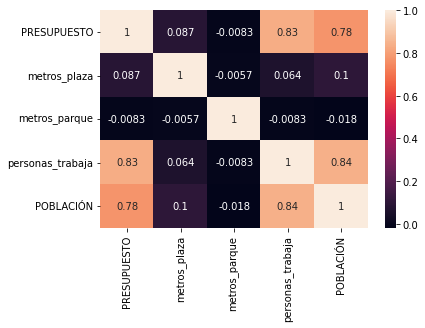

In [ ]:
sns.heatmap(df[['PRESUPUESTO','metros_plaza','metros_parque','personas_trabaja','POBLACIÓN']].corr(), annot = True)
# Podemos notar alta correlación con personas_trabaja y POBLACION

In [ ]:
# Entrenar modelo N1 con variable "Personas_trabaja"
from sklearn.model_selection import train_test_split
data = df[['personas_trabaja','PRESUPUESTO']]
train_set, test_set = train_test_split(data, test_size = 0.15)

In [ ]:
from sklearn.linear_model import LinearRegression
x_train = train_set[['personas_trabaja']]
y_train = train_set[['PRESUPUESTO']]

In [ ]:
# Modelo sin entrenar
lin_reg = LinearRegression() 

In [ ]:
# Pasar los datos de entrenamiento
lin_reg.fit (x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

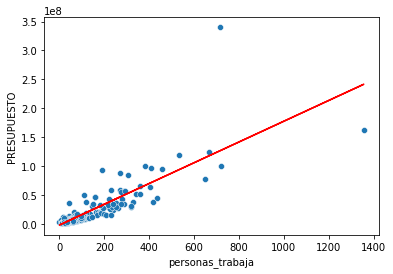

In [ ]:
sns.scatterplot(data = df, x = 'personas_trabaja', y = 'PRESUPUESTO')
persona = df[['personas_trabaja']]
presup = df[['PRESUPUESTO']]
plt.plot(persona, lin_reg.predict(persona), color = 'red')

In [ ]:
# Medidas de desempeño
# 1) Error cuadratico medio
from sklearn.metrics import mean_squared_error
x_test = test_set[['personas_trabaja']]
y_pred = lin_reg.predict(x_test)
y_pred

y_test = test_set[['PRESUPUESTO']]
y_test

lin_mse = mean_squared_error(y_test,y_pred)
lin_mse


97728144357030.19

In [ ]:
# Valor más aterrizado al contexto con...
np.sqrt(lin_mse)

9885754.617480153

In [ ]:
# 2) R2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5990758829428766

In [ ]:
# 3) cross-validation
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

x = df[['personas_trabaja']]
y = df[['PRESUPUESTO']]
scores = cross_val_score(lin_reg, x, y, scoring ='neg_mean_squared_error', cv=5)

lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([ 9203923.18096245,  4231335.83886512,  6820860.96223242,
       31556154.92961301, 12610603.67859604])

In [ ]:
# Entrenar modelo N2 con variable "POBLACION"
data = df[['POBLACIÓN','PRESUPUESTO']]
train_set, test_set = train_test_split(data, test_size = 0.15)


In [ ]:
x_train2 = train_set[['POBLACIÓN']]
y_train2 = train_set[['PRESUPUESTO']]

In [ ]:
# Modelo sin entrenar
lin_reg2 = LinearRegression() 

In [ ]:
# Pasar los datos de entrenamiento
lin_reg2.fit (x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

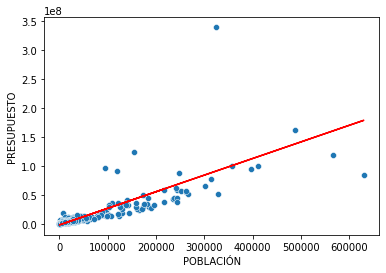

In [ ]:
sns.scatterplot(data = df, x = 'POBLACIÓN', y = 'PRESUPUESTO')
pobla = df[['POBLACIÓN']]
presup = df[['PRESUPUESTO']]
plt.plot(pobla, lin_reg2.predict(pobla), color = 'red')

In [ ]:
# Medidas de desempeño
# 1) Error cuadratico medio

x_test = test_set[['POBLACIÓN']]
y_pred = lin_reg2.predict(x_test)
y_pred

y_test = test_set[['PRESUPUESTO']]
y_test

lin_mse = mean_squared_error(y_test,y_pred)
lin_mse

435218064312439.6

In [ ]:
# Valor más aterrizado al contexto con...
np.sqrt(lin_mse)

20861880.651380394

In [ ]:
# 2) R2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.35257840851472877

In [ ]:
# 3) cross-validation
from sklearn.model_selection import cross_val_score

lin_reg2 = LinearRegression()

x2 = df[['POBLACIÓN']]
y2 = df[['PRESUPUESTO']]
scores2 = cross_val_score(lin_reg2, x2, y2, scoring ='neg_mean_squared_error', cv=5)

lin_rmse_scores2 = np.sqrt(-scores2)
lin_rmse_scores2

array([ 4900072.00757227,  4956265.81988176,  5000467.74374843,
       37099744.33812281, 19957493.056282  ])

Análisis de los resultados

Luego de haber realizado dos modelos de regresión para predecir el presupuesto, por medio de dos variables que presentaron alta correlacion, nos damos cuenta que el mejor modelo fue el que se utiliza la variable trabajadores_total, ya que tiene mayor R2 (medida de desempeño), 85.6% frente a solo un 36,7%.
Para poder mejorar el desempeño de los modelos deberiamos notar la existencia de puntos "outliears" por medio de visualizaciones (manera rápida), estos puntos son los que generar ruido dentro de los modelos y generan complicaciones en las predicciones, por tanto se deberian sacar de la data y proceder a realizar la creación del modelo nuevamente.

## Pregunta 2

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
iris.keys()
df = pd.DataFrame(iris['data'])
df.columns = iris.feature_names
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Recuerda que las flores Virgínica son las de tipo 2
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Dividiremos los datos en los grupos de test y train.
X_train, X_test, y_train, y_test = train_test_split(df, iris["target"], test_size = 0.3)

In [ ]:
#Transformaremos las variables numéricas a binarias True/False.
y_train = (y_train == 2)
y_test = (y_test == 2)

In [ ]:
from sklearn.linear_model import SGDClassifier

# Modelo que vamos a entrenar
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Predecimos
y_pred = sgd_clf.predict(X_test)
y_pred

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False])

In [ ]:
#Calculamos matriz de confusión
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[21  6]
 [ 0 18]]


In [ ]:
#Calculamos accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8666666666666667


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Calculamos precision
print(precision_score(y_test, y_pred))

0.75


In [ ]:
#Calculamos recall
print(recall_score(y_test, y_pred))

1.0


Notamos que el modelo logra un 0.8666 de accuracy, por lo que acierta en un 86.6% de los casos. El precision de nuestro modelo alcanza 0.75, lo cual significa que un 75% de las flores que creyó que eran Iris Virginica realmente lo eran. En cambio, el recall llega a 1, quiere decir que, de las flores que pueden ser Iris Virginica, el modelo las identifica en su totalidad. 

Dados los resultados podemos decir que nuestro modelo es bueno, tiene un buen accuracy que nos muestra que acierta la mayoría de sus predicciones, los números del recall y del precision también nos indica que el modelo funciona generalmente bien y se puede utilizar para sacar conclusiones correctas a la hora de predecir que tipo de flor corresponde. En nuestro modelo especificamente, se privilegiaría minimizar los falsos negativos.

Este modelo se puede mejorar agregando un mayor volumen de datos para que se entrene con mayor diversidad de variables y sea más preciso. También se puedrían agregar más variables a cada dato, actualmente se tienen solo 4 variables con los que el modelo debe predecir, si agregaramos un par de columnas más el modelo obtendrá más información y predecirá de mejor manera.

Un ejemplo donde privilegiar el recall es mejor que privilegiar el precision es en la medicina, es preferible diagnosticar un caso que no es, que no diagnosticar una enfermedad y que el paciente realmente la tenga, en ese caso es mejor tener un mayor recall que precision, ya que así minimizaremos los falsos negativos. 
En cambio,en los tests de embarazo por ejemplo, es preferible dar negativo en caso de ser positivo que dar positivo sin que la mujer esté embarazada. En ese ejemplo sería más importante tener un mayor precision para minimizar los falsos positivos.